In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import spline
plt.rcParams['figure.figsize'] = (20, 10)


In [5]:
P, I ,D = 1.2,0.9,0.35
v = 0.85
u= 0
e_ = 0
ep = 0

ul = []
vl = []
for i in range(50):
    if(i<11):
        ul.append(0)
        vl.append(0)
        continue
    if(i<12):
        ul.append(0)
        vl.append(1)
        continue

    e = v - u
    e_ += e
    ed = ep-e
    ep = e
    u += P *e + I*e_ + D * ed
    ul.append(u)
    vl.append(1)


/home/robotronics/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  


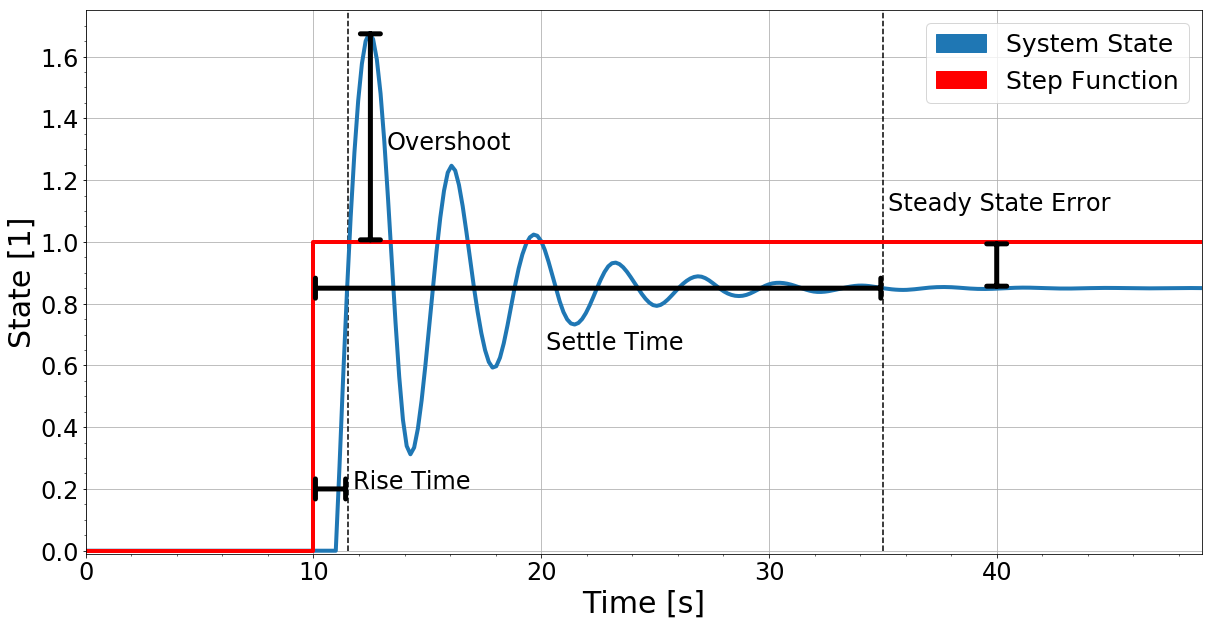

In [6]:
import matplotlib.patches as mpatches

x = np.linspace(0,len(vl)-1,len(vl))
xnew = np.linspace(x.min(),x.max(),300)
power = np.array(ul)
power_smooth = spline(x[11:],power[11:],xnew)

blue_patch = mpatches.Patch(color='#1f77b4', label='System State')
red_patch = mpatches.Patch(color='red', label='Step Function')

fig, ax1 = plt.subplots()
ax1.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax1.set_xlabel('Time [s]', size=30)
ax1.set_ylabel('State [1]', size=30)

plt.plot(xnew,power_smooth,linewidth=4)
plt.step(x,vl,color="r",linewidth=4)

ax1.set_xlim([min(x[:]),max(x)])
ax1.set_ylim([-0.01,1.75])
ax1.legend(handles=[blue_patch,red_patch], prop={'size': 25})

plt.annotate(
    '', xy=(40, 0.85), xycoords='data',
    xytext=(40, 1), textcoords='data',
    arrowprops=dict(arrowstyle= "|-|",lw=5))
plt.annotate(
    'Steady State Error', xy=(35, 1.1), xycoords='data',
    xytext=(5, 0), textcoords='offset points',size=24)

plt.annotate(
    '', xy=(12.5, 1), xycoords='data',
    xytext=(12.5, 1.68), textcoords='data',
    arrowprops=dict(arrowstyle= "|-|",lw=5))
plt.annotate(
    'Overshoot', xy=(13, 1.3), xycoords='data',
    xytext=(5, 0), textcoords='offset points',size=24)

plt.annotate(
    '', xy=(10, 0.2), xycoords='data',
    xytext=(11.5, 0.2), textcoords='data',
    arrowprops=dict(arrowstyle= "|-|",lw=5))
plt.annotate(
    'Rise Time', xy=(11.5, 0.2), xycoords='data',
    xytext=(5, 0), textcoords='offset points',size=24)
plt.vlines(11.5, 0, 4, linestyles='dashed')

plt.annotate(
    '', xy=(10, 0.85), xycoords='data',
    xytext=(35, 0.85), textcoords='data',
    arrowprops=dict(arrowstyle= "|-|",lw=5))
plt.annotate(
    'Settle Time', xy=(20, 0.65), xycoords='data',
    xytext=(5, 0), textcoords='offset points',size=24)
plt.vlines(35, 0, 4, linestyles='dashed')

plt.minorticks_on()
plt.grid()
plt.savefig('/home/robotronics/Pictures/PID_template.png', format='png', dpi=100)